# Model description

    S -> E -> I1 -> I2 -> I3 -> R 
    
### Transitions

we have $k = 3$ compartments of infected to get the quantile of the Ehrlang distribution right. We fix $R_0$ according to scenarios. Then 

- $S\longrightarrow E$ :       rate $\beta$ as $\beta = \frac{R_0 \cdot \gamma}{k}$  from $R_0$ 

- $E\longrightarrow I$ :       rate $\sigma = \frac{1}{5.2}$ d$^{-1}$

- $I_1\longrightarrow I_2$ :   rate $\gamma = \frac{1}{6} \cdot k$ d$^{-1}$

- $I_2\longrightarrow I_3$ :   rate $\gamma = \frac{1}{6} \cdot k$ d$^{-1}$

- $I_3\longrightarrow R$ :     rate $\gamma = \frac{1}{6} \cdot k$ d$^{-1}$

##### Approximated transitions:

- $p_{expose} =    1 - \exp(-\delta t \cdot \beta \cdot \frac{I_1 + I_2 + I_3}{H})$

- $p_{infect} =    1 - \exp(-\delta t \cdot \sigma)$

- $p_{recover} =   1 - \exp(-\delta t \cdot \gamma)$

and then draws in a binomial distribution, e.g $N_{I_1\longrightarrow I_2}(t) = \text{Binom}(I_1, 1 - \exp(-\delta t \cdot \gamma))$

In [3]:
import numpy as np
import pandas as pd
import datetime, time
from SEIR import setup, seir

interactive = False #if True, show figures

s = setup.Setup(setup_name = 'midSD',
                spatial_setup = setup.CaliforniaSpatialSetup(),
                nsim = 5, 
                ti = datetime.date(2020, 1, 23),
                tf = datetime.date(2020, 4, 1))


s.set_filter(np.loadtxt('california-data-county/filter_github.txt'))

p = setup.COVID19Parameters(s.setup_name, s.nbetas)

# SF has GEOID 6075
# SC has GEOID 6067
seeding_place = 6075
seeding_amount = [3]
s.buildIC(seeding_places = [int(s.spatset.data[s.spatset.data['name'] == seeding_place].id)], 
          seeding_amount = seeding_amount)

tic = time.time()
seir.onerun_SEIR(s, p, 0)
print(f">>> Compilation done in {time.time()-tic} seconds...")

seir = seir.run_parallel(s, p)

results = setup.Results(s, seir)

simR = results.save_output_for_R(seir, write = False)
            


results.build_comp_data()

FileNotFoundError: [Errno 2] File california-data-county/california_data.csv does not exist: 'california-data-county/california_data.csv'

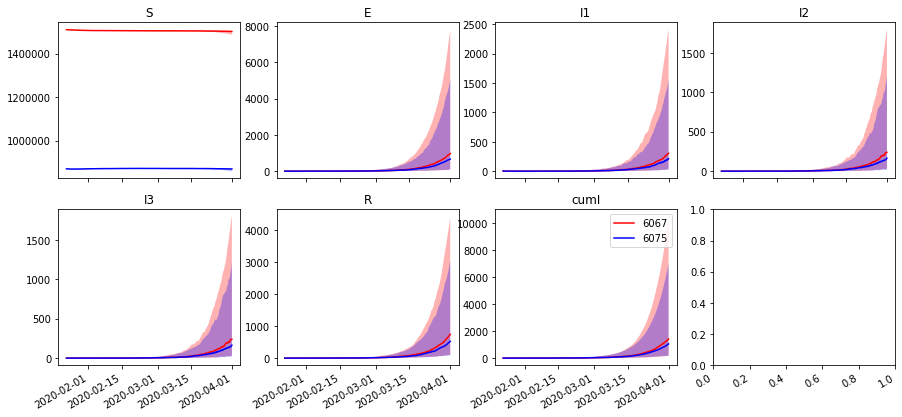

In [7]:
nodes_to_plot = [int(s.spatset.data[s.spatset.data['name']== 6067].id), 
                 int(s.spatset.data[s.spatset.data['name'] == 6075].id)]

fig, axes = results.plot_all_comp(nodes_to_plot)


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x130684a90>,
       dtype=object))

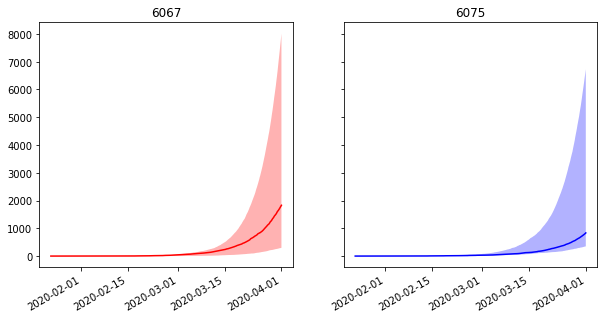

In [3]:
results.plot_comp_mult('cumI', nodes_to_plot)

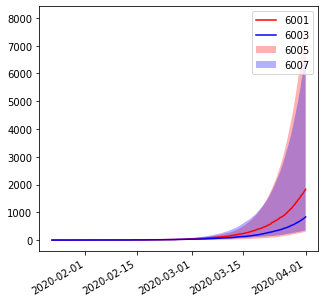

In [4]:
fig, axes = results.plot_comp('cumI', nodes_to_plot)

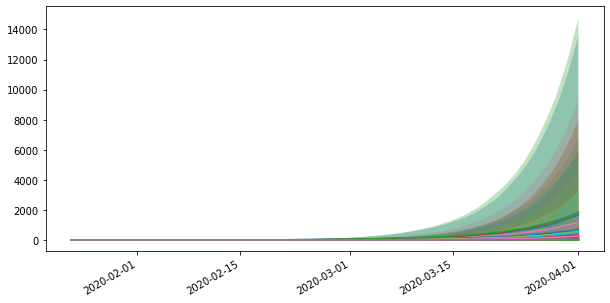

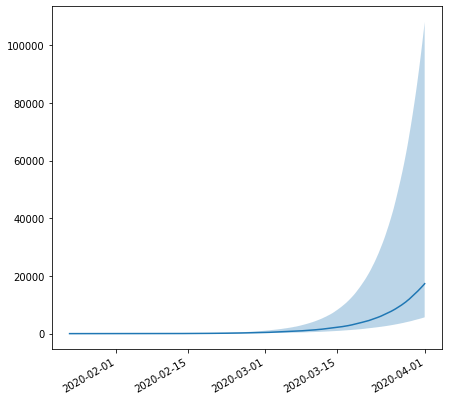

In [5]:
results.plot_quick_summary()

In [9]:
seir[0].shape

(7, 58, 415)

In [5]:
import psutil


ModuleNotFoundError: No module named 'psutil'

In [6]:
import multiprocessing

multiprocessing.cpu_count()

8

In [7]:
import os


In [9]:
len(os.sched_getaffinity(0))

AttributeError: module 'os' has no attribute 'sched_getaffinity'

### checks with doubling time

We are aiming for 8.2 days of serial interval

We have a mean $R_0 = 2.5$, and a serial interval of $1/2 (1/\gamma \cdot 1/k) + 1/\sigma = 3 + 5.2  = 8.2$. We have 69 days since seeding, giving 8.4 generation. That means that we have $n_{seed}\cdot 2.5^{8.4} = 3 \cdot 2'201 = 6'603$ infected at the end of simulation.

The actual serial interval from the `q50.sum(axis=1)[-1]` $?/3 = 5332$, number of generation (wolfram alpha, I'm tired stupid) $9.3$ days -> 10 days effective interval. 

Longer in actual sims. Is that because of stochastic dieout or mobility ? Let's try by disabling mobility:

The actual serial interval from the `q50.sum(axis=1)[-1]` $1'949/3 = 649$, number of generation (wolfram alpha, I'm tired stupid) $7$ days -> 9.8 days effective interval. No that much different.

In [119]:
q50.sum(axis=1)[-1]/3

5332.166666666667

In [120]:
69/9.3

7.419354838709677